**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [18]:
# Write your code here

import numpy as np
from scipy.optimize import minimize, fsolve, minimize_scalar
from types import SimpleNamespace

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [19]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [20]:
# write you answer here
par.T = 0.0
w = 1.0

def labor_demand(p, A, gamma, w):
    return (p * A * gamma / w) ** (1 / (1 - gamma))

def output(p, A, gamma, w):
    l = labor_demand(p, A, gamma, w)
    return A * l ** gamma

def profit(p, A, gamma, w):
    l = labor_demand(p, A, gamma, w)
    y = output(p, A, gamma, w)
    return p * y - w * l

def utility(p1, p2, w, tau, T, A, gamma, alpha, nu, epsilon):
    def obj(l):
        pi1 = profit(p1, A, gamma, w)
        pi2 = profit(p2, A, gamma, w)
        budget = w * l + T + pi1 + pi2
        c1 = alpha * budget / p1
        c2 = (1 - alpha) * budget / (p2 + tau)
        U = np.log(c1 ** alpha * c2 ** (1 - alpha)) - nu * l ** (1 + epsilon) / (1 + epsilon)
        return -U  # negative utility for minimization

    result = minimize_scalar(obj, bounds=(0, 100), method='bounded')
    l_star = result.x
    pi1 = profit(p1, A, gamma, w)
    pi2 = profit(p2, A, gamma, w)
    budget = w * l_star + T + pi1 + pi2
    c1_star = alpha * budget / p1
    c2_star = (1 - alpha) * budget / (p2 + tau)
    return c1_star, c2_star, l_star

# Prices
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)

# Check market clearing
market_clearing_results = []
for p1 in p1_values:
    for p2 in p2_values:
        c1_star, c2_star, l_star = utility(p1, p2, w, par.tau, par.T, par.A, par.gamma, par.alpha, par.nu, par.epsilon)
        l1_star = labor_demand(p1, par.A, par.gamma, w)
        l2_star = labor_demand(p2, par.A, par.gamma, w)
        y1_star = output(p1, par.A, par.gamma, w)
        y2_star = output(p2, par.A, par.gamma, w)

        # Check conditions
        labor_market_clears = np.isclose(l_star, l1_star + l2_star)
        good_market_1_clears = np.isclose(c1_star, y1_star)
        good_market_2_clears = np.isclose(c2_star, y2_star)

        result = {
            'p1': p1, 'p2': p2, 'labor_market': labor_market_clears,
            'good_market_1': good_market_1_clears, 'good_market_2': good_market_2_clears
        }
        market_clearing_results.append(result)



{'p1': 0.1, 'p2': 0.1, 'labor_market': False, 'good_market_1': False, 'good_market_2': False}
{'p1': 0.1, 'p2': 0.3111111111111111, 'labor_market': False, 'good_market_1': False, 'good_market_2': False}
{'p1': 0.1, 'p2': 0.5222222222222223, 'labor_market': False, 'good_market_1': False, 'good_market_2': False}
{'p1': 0.1, 'p2': 0.7333333333333333, 'labor_market': False, 'good_market_1': False, 'good_market_2': False}
{'p1': 0.1, 'p2': 0.9444444444444444, 'labor_market': False, 'good_market_1': False, 'good_market_2': False}
{'p1': 0.1, 'p2': 1.1555555555555557, 'labor_market': False, 'good_market_1': False, 'good_market_2': False}
{'p1': 0.1, 'p2': 1.3666666666666667, 'labor_market': False, 'good_market_1': False, 'good_market_2': False}
{'p1': 0.1, 'p2': 1.577777777777778, 'labor_market': False, 'good_market_1': False, 'good_market_2': False}
{'p1': 0.1, 'p2': 1.788888888888889, 'labor_market': False, 'good_market_1': False, 'good_market_2': False}
{'p1': 0.1, 'p2': 2.0, 'labor_market

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [21]:
# write your answer here

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

Optimal tau: 0.13671402186939574
Equilibrium prices with optimal tau: [0.95640298 1.39417101]
Implied optimal T: 0.09530136325571639
Social Welfare for tau = 0: -0.6621612864598336
Social Welfare for optimal tau: -0.6596933786135991


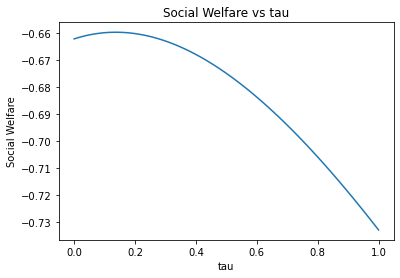

In [22]:


# Parameter setup
par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0
par.kappa = 0.1
w = 1.0

# Supporting functions
def labor_demand(p, A, gamma, w):
    return (p * A * gamma / w) ** (1 / (1 - gamma))

def output(p, A, gamma, w):
    l = labor_demand(p, A, gamma, w)
    return A * l ** gamma

def profit(p, A, gamma, w):
    l = labor_demand(p, A, gamma, w)
    y = output(p, A, gamma, w)
    return p * y - w * l

def utility(p1, p2, w, tau, T, A, gamma, alpha, nu, epsilon):
    def obj(l):
        pi1 = profit(p1, A, gamma, w)
        pi2 = profit(p2, A, gamma, w)
        budget = w * l + T + pi1 + pi2
        c1 = alpha * budget / p1
        c2 = (1 - alpha) * budget / (p2 + tau)
        U = np.log(c1 ** alpha * c2 ** (1 - alpha)) - nu * l ** (1 + epsilon) / (1 + epsilon)
        return -U
    result = minimize_scalar(obj, bounds=(0, 100), method='bounded')
    l_star = result.x
    pi1 = profit(p1, A, gamma, w)
    pi2 = profit(p2, A, gamma, w)
    budget = w * l_star + T + pi1 + pi2
    c1_star = alpha * budget / p1
    c2_star = (1 - alpha) * budget / (p2 + tau)
    return c1_star, c2_star, l_star

def find_equilibrium_prices(tau, initial_guess=[1.0, 1.0]):
    def equilibrium_conditions(prices):
        p1, p2 = prices
        c1_star, c2_star, l_star = utility(p1, p2, w, tau, 0, par.A, par.gamma, par.alpha, par.nu, par.epsilon)
        y1_star = output(p1, par.A, par.gamma, w)
        y2_star = output(p2, par.A, par.gamma, w)
        return np.array([c1_star - y1_star, c2_star - y2_star]).flatten()
    return fsolve(equilibrium_conditions, initial_guess)

def swf_optimization(tau):
    p1, p2 = find_equilibrium_prices(tau)
    c1_star, c2_star, l_star = utility(p1, p2, w, tau, 0, par.A, par.gamma, par.alpha, par.nu, par.epsilon)
    T = tau * c2_star
    c1_star, c2_star, l_star = utility(p1, p2, w, tau, T, par.A, par.gamma, par.alpha, par.nu, par.epsilon)
    y2_star = output(p2, par.A, par.gamma, w)
    U = np.log(c1_star ** par.alpha * c2_star ** (1 - par.alpha)) - par.nu * l_star ** (1 + par.epsilon) / (1 + par.epsilon)
    SWF = U - par.kappa * y2_star
    return -SWF

# Numerical optimization to find optimal tau
opt_result = minimize(lambda tau: swf_optimization(tau), 0.1, bounds=[(0, None)], method='L-BFGS-B')
optimal_tau = opt_result.x[0]
optimal_prices = find_equilibrium_prices(optimal_tau)

# Complete the utility function call to get c2_star
_, optimal_c2_star, _ = utility(optimal_prices[0], optimal_prices[1], w, optimal_tau, 0, par.A, par.gamma, par.alpha, par.nu, par.epsilon)
optimal_T = optimal_tau * optimal_c2_star  # Calculate T using the correct c2_star

# Calculate SWF for tau = 0
swf_tau_0 = -swf_optimization(0.0)

# Calculate SWF for optimal tau
swf_optimal_tau = -swf_optimization(optimal_tau)

print(f"Optimal tau: {optimal_tau}")
print(f"Equilibrium prices with optimal tau: {optimal_prices}")
print(f"Implied optimal T: {optimal_T}")
print(f"Social Welfare for tau = 0: {swf_tau_0}")
print(f"Social Welfare for optimal tau: {swf_optimal_tau}")
import matplotlib.pyplot as plt

# Calculate social welfare for different values of tau
tau_values = np.linspace(0, 1, 100)
swf_values = [-swf_optimization(tau) for tau in tau_values]

# Plot social welfare vs tau
plt.plot(tau_values, swf_values)
plt.xlabel('tau')
plt.ylabel('Social Welfare')
plt.title('Social Welfare vs tau')
plt.show()


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [23]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [24]:
# write your answer here

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

In [25]:
# Write your answer here 

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [26]:
# write your answer here

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [27]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [28]:
# write your answer here

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [29]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [30]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [31]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [32]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [33]:
# write your answer here